In [32]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [34]:
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")

In [38]:
#white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
#if value <= 4 else 'medium'
#if value <= 6 else 'high')

# 3 4 5 are low, 6 7 medium, 8 and nonexistent 9 are high
#changed to: 3 4 low, 5 6 medium, 7 8 (and 9) high

#white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
#categories=['low', 'medium', 'high'])

white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high


In [36]:
# fit scaler on training data
norm = MinMaxScaler().fit(white_wine)

# transform training data
white_wine_norm = norm.transform(white_wine)

# transform testing data
white_wine_test_norm = norm.transform(white_wine)

print(white_wine_test_norm)

ValueError: could not convert string to float: 'medium'

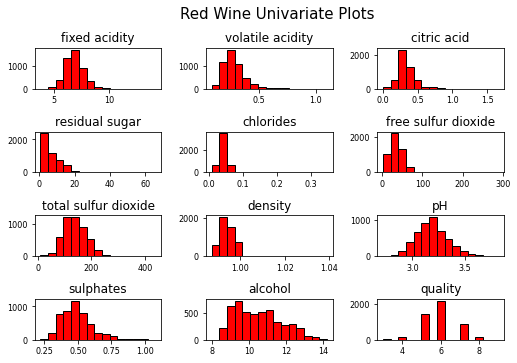

In [ ]:
#sprint 2 Univariate analysis

white_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [ ]:
#Skewness measures asymmetry in the data distribution

print(white_wine['residual sugar'].astype(float).skew())

1.0770937564240868


In [ ]:
#Kurtosis identifies outliers: data with high kurtosis (heavy-tailed data) is proof of outliers, and data with low kurtosis (light-tailed data) lacks them.

print(white_wine['residual sugar'].astype(float).kurt())

3.4698201025634265


In [ ]:
white_wine["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
white_wine["pH"].unique()

array([3.  , 3.3 , 3.26, 3.19, 3.18, 3.22, 2.99, 3.14, 3.54, 2.98, 3.25,
       3.24, 3.33, 3.12, 3.17, 3.47, 3.05, 3.42, 3.45, 3.38, 3.1 , 3.2 ,
       3.37, 3.13, 3.21, 3.11, 3.16, 3.27, 3.36, 3.35, 3.34, 3.32, 3.31,
       3.09, 3.03, 3.02, 3.15, 3.69, 2.95, 2.94, 3.39, 3.04, 2.89, 3.4 ,
       3.01, 3.63, 3.29, 3.23, 3.28, 3.06, 3.08, 2.87, 2.93, 3.44, 3.5 ,
       3.48, 3.72, 3.53, 3.52, 2.96, 3.61, 3.43, 3.49, 3.51, 3.46, 3.07,
       2.97, 3.41, 3.64, 3.56, 2.86, 2.88, 2.85, 3.58, 3.55, 3.66, 3.59,
       2.74, 2.92, 3.82, 3.81, 3.65, 2.9 , 3.77, 2.91, 3.62, 3.74, 2.8 ,
       3.6 , 2.72, 2.79, 3.57, 3.8 , 3.68, 2.77, 3.79, 3.7 , 2.84, 3.76,
       2.83, 3.75, 2.82, 3.67])

In [41]:
dummies = pd.get_dummies(white_wine.quality)
dummies

,3,4,5,6,7,8,9
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
4893,0,0,0,1,0,0,0
4894,0,0,1,0,0,0,0
4895,0,0,0,1,0,0,0
4896,0,0,0,0,1,0,0


In [42]:
merged = pd.concat([white_wine, dummies], axis="columns")
merged

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,3,4,5,6,7,8,9
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,0,0,0,1,0,0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,0,0,0,1,0,0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,0,0,0,1,0,0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,0,0,0,1,0,0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,0,0,0,1,0,0,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium,0,0,1,0,0,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,0,0,0,1,0,0,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,0,0,0,0,1,0,0


In [ ]:
#rule with dummy variables: drop one of columns.

In [47]:
final = merged.drop(["quality"], axis="columns")
final

#why is this not working (removing "3" for example)?

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,3,4,5,6,7,8,9
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,medium,0,0,0,1,0,0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,medium,0,0,0,1,0,0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,medium,0,0,0,1,0,0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,medium,0,0,0,1,0,0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,medium,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,medium,0,0,0,1,0,0,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,medium,0,0,1,0,0,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,medium,0,0,0,1,0,0,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,high,0,0,0,0,1,0,0


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [58]:
x = final.drop(["quality label"], axis="columns")
x

KeyError: "['quality label'] not found in axis"

In [56]:
y = final.quality
y

AttributeError: 'DataFrame' object has no attribute 'quality'

In [52]:
model.fit(x,y)

/Users/monicavillarfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/monicavillarfuentes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'